In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.special import logsumexp
import matplotlib.pyplot as plt

In [2]:
def get_total_length(log_nu):
    levels = len(log_nu)
    even = [x for i, x in enumerate(log_nu) if i % 2 == 0]
    odd = [x for i, x in enumerate(log_nu) if i % 2 != 0]
    logits = [0]
    for i in range(levels // 2):
        logits.append(sum(even[:(i+1)]))
        logits.append(sum(odd[:(i+1)]))
    return logsumexp(logits)


levels = 10
log_nu = np.log(2) * np.ones([levels])
get_total_length(log_nu)

4.828313737302301

In [3]:
def get_log_inversed_minimal_area(log_nu):
    return sum(log_nu)

get_log_inversed_minimal_area(log_nu)

6.931471805599453

In [4]:
initial_values = [np.random.uniform(3., 5.) for _ in range(levels)]
bounds = [(0., None) for _ in range(levels)]
constraints = [
    {
        'type': 'eq',
        'fun': lambda log_nu: get_log_inversed_minimal_area(log_nu) - 50.
    },
]
result = minimize(
    get_total_length,
    initial_values,
    bounds=bounds,
    constraints=constraints,
    tol=1e-80,
    options={'maxiter': 1000},
)
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 25.693147371297183
       x: [ 2.524e+00  6.429e-01  2.832e+00  3.011e-01  1.964e+00
            1.041e-06  2.702e+00  7.136e+00  1.498e+01  1.692e+01]
     nit: 55
     jac: [ 5.000e-01  5.000e-01  5.000e-01  5.000e-01  5.000e-01
            5.000e-01  5.000e-01  5.000e-01  5.000e-01  5.000e-01]
    nfev: 644
    njev: 54

In [5]:
optimized_log_nu = result.x
optimized_log_nu

array([2.52364851e+00, 6.42926478e-01, 2.83150305e+00, 3.01136933e-01,
       1.96405670e+00, 1.04116293e-06, 2.70190272e+00, 7.13620438e+00,
       1.49788911e+01, 1.69197291e+01])

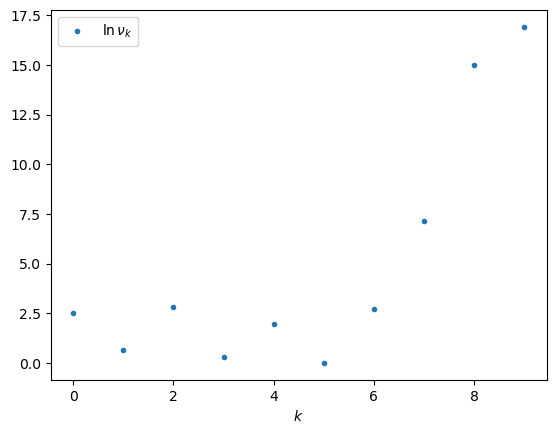

In [6]:
plt.plot(optimized_log_nu, '.', label='$\\ln \\nu_k$')
# plt.plot(np.exp(optimized_log_nu), '.', label='$\\nu_k$')
plt.xlabel('$k$')
plt.legend()
plt.show()

In [13]:
x = 5 * np.ones([levels])
x = [0., 0., 0., 0., 0., 0., 0., 0., 0., 50.]
x = optimized_log_nu
get_total_length(x), get_log_inversed_minimal_area(x)

(25.693147371297183, 50.0)